Rabisha
The Sparks Foundation
GRIP JUNE2021
TASK1 : Predict the percentage of the student based on the no. of study hours.


# Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as npggg
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading Dataset

In [3]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)


In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.shape

(25, 2)

In [13]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [11]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Data Preprocessing and Visualization

<AxesSubplot:>

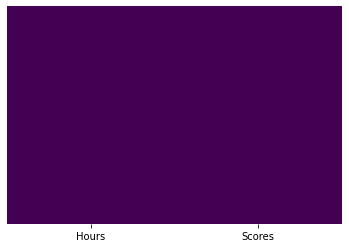

In [10]:
# heatmap to check the null value
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

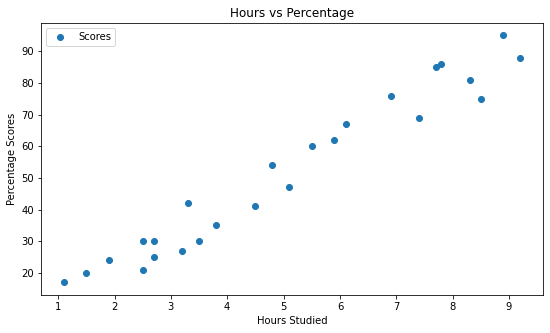

In [14]:
# plotting the graph to see the relation and distrubution of datapoints
data.plot(x="Hours", y="Scores",figsize=(9,5),style="o")
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scores")
plt.show()

#Assumption-from the above graphs we can see that there is positive linear relation between the no. of hours studied and percentage scores

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

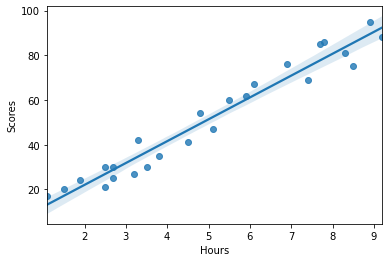

In [15]:
sns.regplot(x="Hours",y="Scores",data=data)

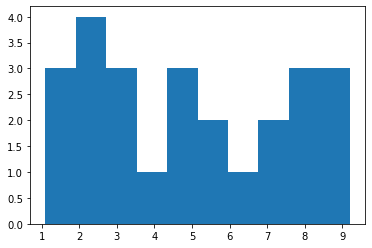

In [17]:
# Distrubution of Hours data
plt.hist(x="Hours",data=data)
plt.show()

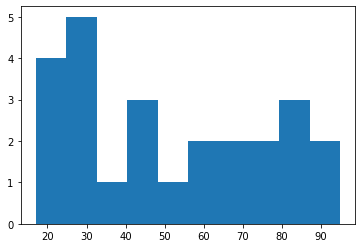

In [18]:
# Distrubution of Scores data

plt.hist(x="Scores",data=data)
plt.show()

#Dividing the dataset into dependent and independent variable

In [19]:
X = data.iloc[:, :-1].values   
y = data.iloc[:, 1].values

#Split this data into train and test data using train_test_split() method from the scikit learn library

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Model Building

#We have to train our data using linear regression algorithm and check the values for test data

In [22]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [23]:
r_line= lr.coef_*X+lr.intercept_  # coefficients and intercepts of data points

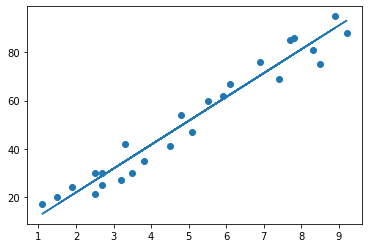

In [24]:
plt.scatter(X,y)
plt.plot(X,r_line)

#Prediction

In [25]:
y_pred =lr.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

Compare actual values with predicted values

In [27]:
data=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [28]:
#score for test data
accuracy=lr.score(x_test, y_test)   
print("Accuracy:",accuracy*100)

Accuracy: 94.54906892105356


In [29]:
# we can test for any input
# here we are calculating the score for 9.25 studied hrs
hours=[[9.25]]
pred = lr.predict(hours)
pred

array([93.69173249])

For 9.25 studied hours, score will be 93.69 percentage

Model Evaluation
In this step we have to evaluate performance of algorithm. We can evaluate by calculating mean squared error or mean absolute error or many other metrices

Mean Absolute Error



In [30]:
from sklearn import metrics
MAE= metrics.mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error: ",MAE)

Mean Absolute Error:  4.183859899002975


mean square error

In [32]:
from sklearn import metrics
MSE= metrics.mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ",MSE)

Mean Squared Error:  21.5987693072174


# Assumption
Error is less and so we can say that our model is good.